In [91]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from matplotlib import ticker as mticker
from matplotlib.ticker import MaxNLocator
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
plt.rcParams['agg.path.chunksize'] = 10000
res_dpi = 1000
ext = 'pdf'

class MathTextSciFormatter(mticker.Formatter):
    def __init__(self, fmt="%1.2e"):
        self.fmt = fmt
    def __call__(self, x, pos=None):
        s = self.fmt % x
        decimal_point = '.'
        positive_sign = '+'
        tup = s.split('e')
        significand = tup[0].rstrip(decimal_point)
        sign = tup[1][0].replace(positive_sign, '')
        exponent = tup[1][1:].lstrip('0')
        if exponent:
            exponent = '10^{%s%s}' % (sign, exponent)
        if significand and exponent:
            s =  r'%s{\times}%s' % (significand, exponent)
        else:
            s =  r'%s%s' % (significand, exponent)
        return "${}$".format(s)
import os



def find_edge(m):
#input mask: inside=1, outside=0

    nside= hp.pixelfunc.get_nside(m)
    edge = np.full_like(m,0)
    
    for i,v in enumerate(m):
        if v:
            nbs = hp.get_all_neighbours(nside,i)
            if all(m[nbs]):
                edge[i] = 0
            else:
                edge[i] = 1
    return edge


bkl = hp.read_map('/Users/bicep/Documents/HealpixMaps/bkmask/bk18_mask_largefield_gal_n0512.fits', field = 0)
maskl = np.where(~np.isnan(bkl),1,0)
nside= hp.pixelfunc.get_nside(maskl)
edgel = find_edge(maskl)
theta_edgel, phi_edgel = hp.pix2ang(nside,np.where(edgel)[0])

bks = hp.read_map('/Users/bicep/Documents/HealpixMaps/bkmask/bk18_mask_smallfield_gal_n0512.fits', field = 0)
masks = np.where(~np.isnan(bks),1,0)
nside= hp.pixelfunc.get_nside(masks)
edges = find_edge(masks)
theta_edges, phi_edges = hp.pix2ang(nside,np.where(edges)[0])

plk_dust_gnilc_2018=hp.read_map('/Users/bicep/Documents/HealpixMaps/planck/COM_CompMap_IQU-thermaldust-gnilc-unires_2048_R3.00.fits', field = 0, nest=True) #K_CMB

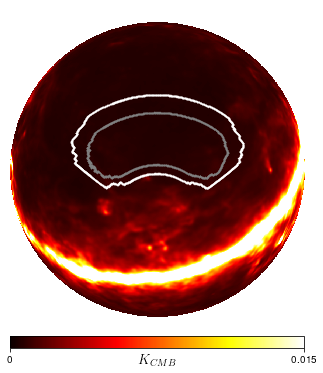

In [131]:
h=hp.orthview(plk_dust_gnilc_2018,rot = [0,-70,0], coord='GC',nest=True, unit = r'$K_{CMB}$', title=' ', notext=True, half_sky=True, cmap='hot', min=0, max=0.015)
hp.visufunc.projscatter(theta_edgel, phi_edgel, 0.2, color='white', coord='GC')
hp.visufunc.projscatter(theta_edges, phi_edges, 0.2, color='grey', coord='GC')

plt.savefig('/Users/bicep/Documents/thesis/MyThesis/planckmaps/bkcmbfield_planckdust.pdf')
